In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import torch
from torchvision import transforms,datasets

# transform
transform = transforms.Compose([
    transforms.ToTensor(),         # Convert images to tensors
])


# Define the path to data
data_path = '/content/gdrive/MyDrive/resized_png__' #data as zip file included in google drive shared folder

# Use torchvision's ImageFolder to load the dataset which will also assign labels
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Print the class names and their corresponding indices
class_names = dataset.classes
class_indices = dataset.class_to_idx
print(class_names)
print(class_indices)

['abnormal', 'normal_augmented']
{'abnormal': 0, 'normal_augmented': 1}


In [32]:

# Define the transformations for augmentation
transform_augmented1 = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
])

transform_augmented2 = transforms.Compose([
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.ToTensor(),
])

transform_augmented3 = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.3),
    transforms.ToTensor(),
])

transform_augmented4 = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.4),
    transforms.ToTensor(),
])

# Load the dataset using ImageFolder and apply the transformations
dataset_augmented1 = datasets.ImageFolder(root=data_path, transform=transform_augmented1)
dataset_augmented2 = datasets.ImageFolder(root=data_path, transform=transform_augmented2)
dataset_augmented3 = datasets.ImageFolder(root=data_path, transform=transform_augmented3)
dataset_augmented4 = datasets.ImageFolder(root=data_path, transform=transform_augmented4)

# Combine the datasets
combined_dataset = torch.utils.data.ConcatDataset([dataset, dataset_augmented1, dataset_augmented2, dataset_augmented3, dataset_augmented4])

# Get the labels for each data point
labels = []
for data_point in combined_dataset:
    labels.append(data_point[1])
# print(labels)

# Split the combined dataset into train and validation with stratification using sklearn
from sklearn.model_selection import train_test_split

# Convert the labels list to a numpy array for compatibility with train_test_split
labels_np = np.array(labels)

# Split the combined dataset into train and validation sets with stratification
train_data, val_data, train_labels, val_labels = train_test_split(
    combined_dataset, labels_np, test_size=0.4, stratify=labels_np, random_state=42
)

# Create data loaders for train and validation
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=8, shuffle=False)

In [6]:
# Split the dataset into training and validation sets
train_dataset, val_dataset = torch.utils.data.random_split(combined_dataset, [0.6, 0.4], stratify=labels)

# Split the combined dataset into train and validation
# train_size = int(0.6 * len(combined_dataset))
# val_size = len(combined_dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(combined_dataset, [train_size, val_size], stratify=labels)

# Create data loaders for train and validation
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=True)


TypeError: random_split() got an unexpected keyword argument 'stratify'

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
train_idx, val_idx = next(splitter.split(combined_dataset, labels))
train_dataset = torch.utils.data.SubsetRandomSampler(train_idx)
val_dataset = torch.utils.data.SubsetRandomSampler(val_idx)

# Create data loaders for train and validation
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

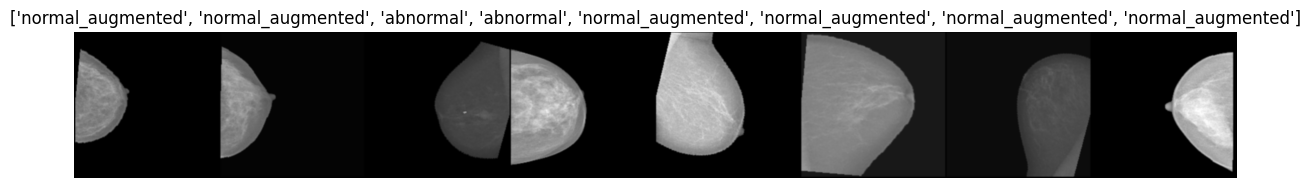

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def imshow(inp, title=None, figsize=(5, 10), interpolation='nearest'):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.figure(figsize=figsize)
    plt.imshow(inp, interpolation=interpolation)
    if title is not None:
        plt.title(title)
    plt.axis('off')  # Turn off axis
    plt.show()

# Replace 'inputs' and 'classes' with your actual batch data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# Visualize the batch
imshow(out, title=[class_names[x] for x in classes], figsize=(15, 15), interpolation='bicubic')

In [19]:
print(torch.max(out))

tensor(1.)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/40, Train Loss: 0.6605, Train Acc: 0.6208, Val Loss: 0.6166, Val Acc: 0.7152
Epoch 2/40, Train Loss: 0.5984, Train Acc: 0.7044, Val Loss: 0.5465, Val Acc: 0.7468
Epoch 3/40, Train Loss: 0.5271, Train Acc: 0.7476, Val Loss: 0.5109, Val Acc: 0.7743
Epoch 4/40, Train Loss: 0.4639, Train Acc: 0.7934, Val Loss: 0.4369, Val Acc: 0.7945
Epoch 5/40, Train Loss: 0.4020, Train Acc: 0.8312, Val Loss: 0.4190, Val Acc: 0.8180
Epoch 6/40, Train Loss: 0.3251, Train Acc: 0.8716, Val Loss: 0.3695, Val Acc: 0.8333
Epoch 7/40, Train Loss: 0.2696, Train Acc: 0.9045, Val Loss: 0.3207, Val Acc: 0.8665
Epoch 8/40, Train Loss: 0.2175, Train Acc: 0.9266, Val Loss: 0.3083, Val Acc: 0.8665
Epoch 9/40, Train Loss: 0.1799, Train Acc: 0.9353, Val Loss: 0.2837, Val Acc: 0.8754
Epoch 10/40, Train Loss: 0.1483, Train Acc: 0.9525, Val Loss: 0.2917, Val Acc: 0.8641
Epoch 11/40, Train Loss: 0.1229, Train Acc: 0.9633, Val Loss: 0.2847, Val Acc: 0.8746
Epoch 12/40, Train Loss: 0.0963, Train Acc: 0.9709, Val Loss: 0

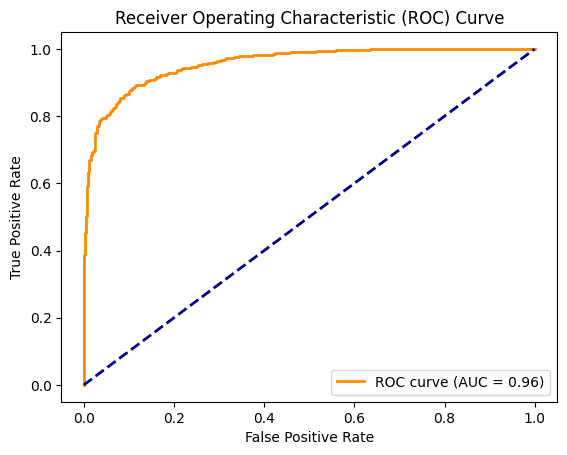

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import torchvision.models as models

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seed
torch.manual_seed(701)

# Load the pretrained ResNet-50 model and move it to the appropriate device (here gpu)
model = models.resnet50(pretrained=True).to(device)  # Load and move model to device

# Modify the last fully connected layer for binary classification (2 classes)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1).to(device)  # Binary classification, so output dimension is 1
model.sigmoid = nn.Sigmoid().to(device)  # Add sigmoid activation to get probabilities

# Loss function (BCELoss) and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.001)#, momentum=0.9)

# Assuming you have defined train_loader and val_loader
# Make sure to move data to the same device as the model

# Training loop with early stopping (deactivated)
num_epochs = 40  # number of epochs
patience = 5  # patience for earlystop
min_val_loss = float('inf')
wait_count = 0
best_epoch = 0
best_model_state = None

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
# val_preds_probs = []
# val_labels = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_train_loss = 0.0
    train_preds = []
    train_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to same device as model
        optimizer.zero_grad()
        outputs = model(inputs)

        # Ensure labels have the same shape as model output for BCELoss
        labels = labels.view(-1, 1).float()  # Reshape labels to [batch_size, 1]

        loss = criterion(model.sigmoid(outputs), labels)  # Apply sigmoid to get probabilities
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

        train_preds.extend((model.sigmoid(outputs) > 0.5).int().tolist())  # Convert probabilities to binary predictions
        train_labels.extend(labels.tolist())

    train_accuracy = accuracy_score(train_labels, train_preds)
    avg_train_loss = running_train_loss / len(train_loader)

    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    val_preds = []
    val_labels = []
    val_preds_probs = []

    with torch.no_grad():
        for val_inputs, val_labels_batch in val_loader:
            val_inputs, val_labels_batch = val_inputs.to(device), val_labels_batch.to(device)  # Move data to same device as model
            val_outputs = model(val_inputs)

            # Ensure labels have the same shape as model output for BCELoss
            val_labels_batch = val_labels_batch.view(-1, 1).float()  # Reshape labels to [batch_size, 1]

            val_loss = criterion(model.sigmoid(val_outputs), val_labels_batch)  # Apply sigmoid to get probabilities
            running_val_loss += val_loss.item()

            val_preds.extend((model.sigmoid(val_outputs) > 0.5).int().tolist())  # Convert probabilities to binary predictions
            val_labels.extend(val_labels_batch.tolist())
            val_preds_probs.extend(model.sigmoid(val_outputs).tolist())  # Collect probabilities for ROC curve

            # Debugging statements
            #print(f'Validation batch: Labels shape = {val_labels_batch.shape}, Preds shape = {(model.sigmoid(val_outputs) > 0.5).int().shape}, Preds_probs shape = {model.sigmoid(val_outputs).shape}')

    val_accuracy = accuracy_score(val_labels, val_preds)
    avg_val_loss = running_val_loss / len(val_loader)

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    # Print training and validation metrics
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    # Check if validation loss has decreased, if not increment wait_count
    if avg_val_loss < min_val_loss:
        min_val_loss = avg_val_loss
        wait_count = 0
        best_epoch = epoch
        best_model_state = model.state_dict()  # Save the best model state
    else:
        wait_count += 1
        if wait_count >= patience:
            print(f"Early stopping at epoch {epoch+1}, best epoch: {best_epoch+1}")
            break

# Save the best model  (in this code final state since earlystop disabled)
torch.save(best_model_state, 'model_bce.pth')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(val_labels, val_preds_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
!mv model_bce.pth /content/gdrive/MyDrive/Colab\ Notebooks/Devan*/

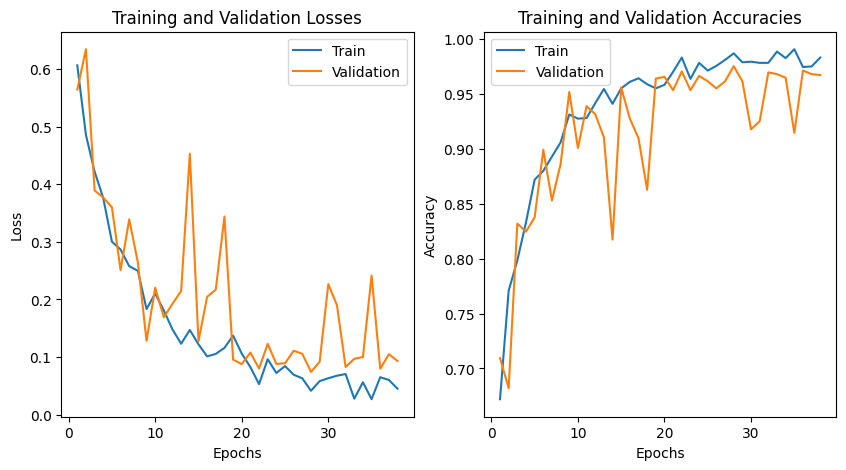

In [ ]:
plt.figure(figsize=(10, 5))

# Plot train and val losses
plt.subplot(1, 2, 1)
plt.plot(range(1, epoch + 2), train_losses, label='Train')
plt.plot(range(1, epoch + 2), val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

# Plot train and val accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, epoch + 2), train_accuracies, label='Train')
plt.plot(range(1, epoch + 2), val_accuracies, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()

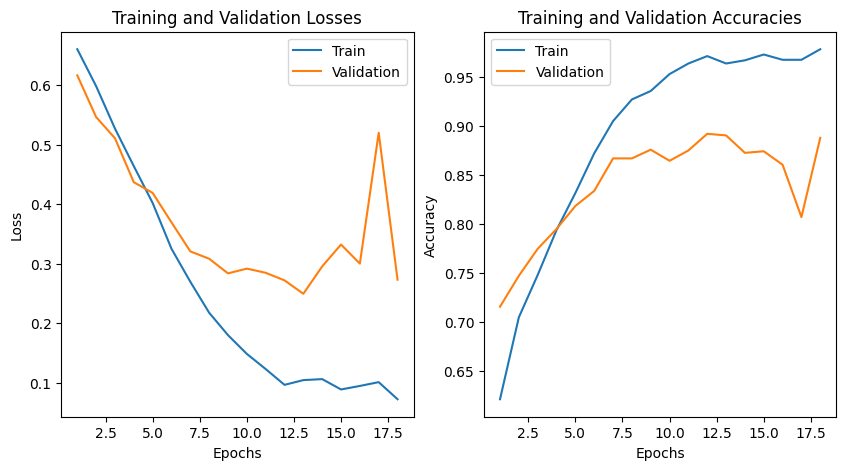

In [35]:
plt.figure(figsize=(10, 5))

# Plot train and val losses
plt.subplot(1, 2, 1)
plt.plot(range(1, epoch + 2), train_losses, label='Train')
plt.plot(range(1, epoch + 2), val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

# Plot train and val accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, epoch + 2), train_accuracies, label='Train')
plt.plot(range(1, epoch + 2), val_accuracies, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()

Specificity: 0.9518072289156626
Sensitivity: 0.9842657342657343


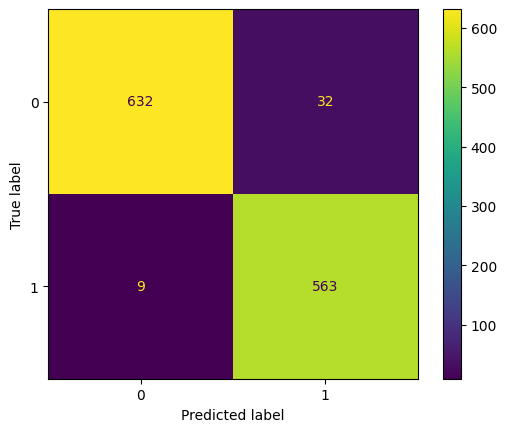

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(val_labels, val_preds)
ConfusionMatrixDisplay(cm).plot()

tn, fp, fn, tp = confusion_matrix(val_labels, val_preds).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Specificity: 0.9114114114114115
Sensitivity: 0.8596491228070176


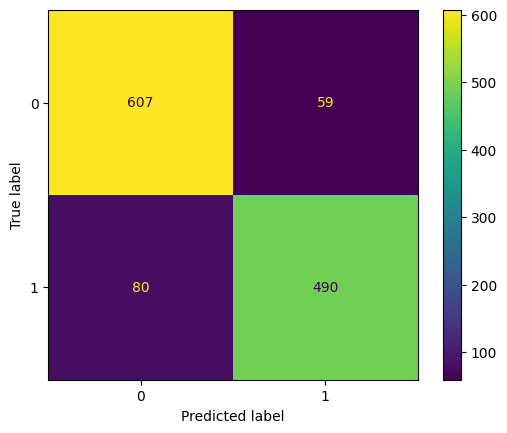

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(val_labels, val_preds)
ConfusionMatrixDisplay(cm).plot()

tn, fp, fn, tp = confusion_matrix(val_labels, val_preds).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

In [37]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Load the model
model.eval()  # Set the model to evaluation mode

# Load the unseen data using ImageFolder (replace 'unseen_data_path' with your actual path)
unseen_data = ImageFolder(root='/content/gdrive/MyDrive/holdout', transform=transform)

# Create a data loader for the unseen data
unseen_loader = DataLoader(unseen_data, batch_size=8, shuffle=False)

# Perform inference on the unseen data
unseen_preds_probs = []
unseen_labels = []
unseen_preds = []

with torch.no_grad():
    for inputs, labels in unseen_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
        outputs = model(inputs)
        predictions = (model.sigmoid(outputs) > 0.5).int()  # Convert probabilities to binary predictions
        unseen_preds_probs.extend(model.sigmoid(outputs).tolist())  # Collect probabilities
        unseen_preds.extend(predictions.tolist())
        unseen_labels.extend(labels.tolist())

print(unseen_labels)
print(unseen_preds)

# Calculate accuracy on the unseen data
unseen_accuracy = accuracy_score(unseen_labels, unseen_preds)

print(f'Accuracy on unseen data: {unseen_accuracy:.4f}')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1]]
Accuracy on unseen data: 0.5500


In [31]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Load the model
model.eval()  # Set the model to evaluation mode

# Load the unseen data using ImageFolder (replace 'unseen_data_path' with your actual path)
unseen_data = ImageFolder(root='/content/gdrive/MyDrive/holdout', transform=transform)

# Create a data loader for the unseen data
unseen_loader = DataLoader(unseen_data, batch_size=8, shuffle=False)

# Perform inference on the unseen data
unseen_preds_probs = []
unseen_labels = []
unseen_preds = []

with torch.no_grad():
    for inputs, labels in unseen_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
        outputs = model(inputs)
        predictions = (model.sigmoid(outputs) > 0.5).int()  # Convert probabilities to binary predictions
        unseen_preds_probs.extend(model.sigmoid(outputs).tolist())  # Collect probabilities
        unseen_preds.extend(predictions.tolist())
        unseen_labels.extend(labels.tolist())

print(unseen_labels)
print(unseen_preds)

# Calculate accuracy on the unseen data
unseen_accuracy = accuracy_score(unseen_labels, unseen_preds)

print(f'Accuracy on unseen data: {unseen_accuracy:.4f}')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0]]
Accuracy on unseen data: 0.6000


In [ ]:
from torchsummary import summary

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Print model summary
model.to(device)
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,